In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
def compare_result(pred, test):
  data = {'y_pred': pred, 'y_test':test}
  df = pd.DataFrame(data)
  return df

# DATA PREPROCESSING

# Split independet-dependent var

In [ ]:
dir = '/content/drive/MyDrive/Semester 5/Sistem Cerdas/'
dataset = pd.read_csv(dir + 'Heart Failure Clinical Records.csv')
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]

In [ ]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


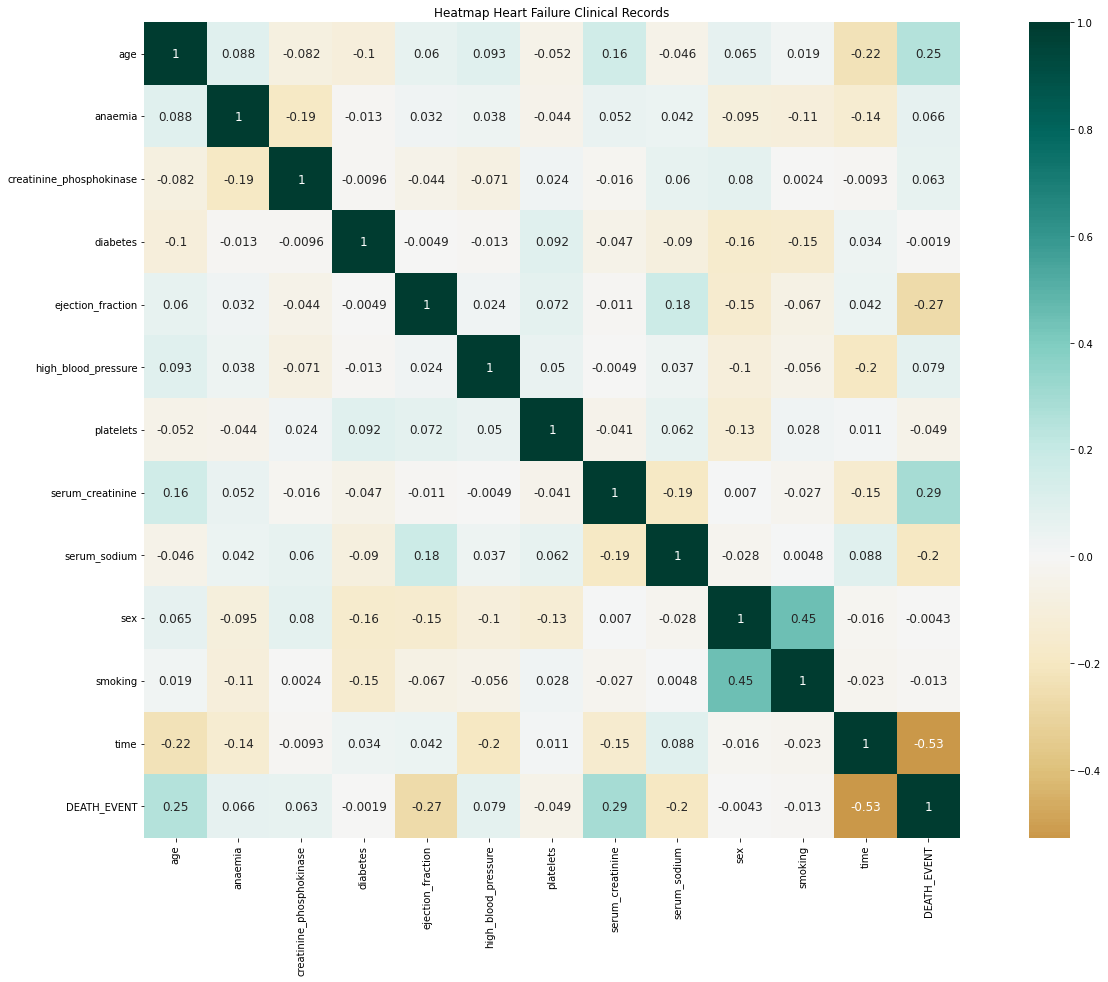

In [ ]:
plt.figure(1, figsize=(25,15))
plt.title('Heatmap Heart Failure Clinical Records')
sns.heatmap(dataset.corr(), cmap="BrBG", annot=True, annot_kws={'size': 12}, square=True, center=0)

Melalui heatmap dapat diketahui bahwa 'Ejection_fraction' , 'serum_sodium', dan 'time' memiliki pengaruh kecil terhadap independent variabel (DEATH_EVENT)

In [ ]:
x = x.drop(columns=['ejection_fraction', 'serum_sodium', 'time'], axis=1)

print(x)
print(y)

      age  anaemia  creatinine_phosphokinase  diabetes  high_blood_pressure  \
0    75.0        0                       582         0                    1   
1    55.0        0                      7861         0                    0   
2    65.0        0                       146         0                    0   
3    50.0        1                       111         0                    0   
4    65.0        1                       160         1                    0   
..    ...      ...                       ...       ...                  ...   
294  62.0        0                        61         1                    1   
295  55.0        0                      1820         0                    0   
296  45.0        0                      2060         1                    0   
297  45.0        0                      2413         0                    0   
298  50.0        0                       196         0                    0   

     platelets  serum_creatinine  sex  smoking  
0 

In [ ]:
for idx,data in enumerate(x['age']):
  target = x.loc[dataset.index == idx, 'age']
  if target.values <= 15:
    x.loc[dataset.index == idx, 'age'] = 'anak-anak'
  elif target.values > 15 and target.values <= 24:
    x.loc[dataset.index == idx, 'age'] = 'muda'
  elif target.values > 24 and target.values <= 34:
    x.loc[dataset.index == idx, 'age'] = 'pekerja awal'
  elif target.values > 34 and target.values <= 44:
    x.loc[dataset.index == idx, 'age'] = 'paruh baya'
  elif target.values > 44 and target.values <= 54:
    x.loc[dataset.index == idx, 'age'] = 'pra-pensiun'
  elif target.values > 54 and target.values <= 64:
    x.loc[dataset.index == idx, 'age'] = 'pensiun'
  else:
    x.loc[dataset.index == idx, 'age'] = 'lanjut'

In [ ]:
print(x)

             age  anaemia  creatinine_phosphokinase  diabetes  \
0         lanjut        0                       582         0   
1        pensiun        0                      7861         0   
2         lanjut        0                       146         0   
3    pra-pensiun        1                       111         0   
4         lanjut        1                       160         1   
..           ...      ...                       ...       ...   
294      pensiun        0                        61         1   
295      pensiun        0                      1820         0   
296  pra-pensiun        0                      2060         1   
297  pra-pensiun        0                      2413         0   
298  pra-pensiun        0                       196         0   

     high_blood_pressure  platelets  serum_creatinine  sex  smoking  
0                      1  265000.00               1.9    1        0  
1                      0  263358.03               1.1    1        0  
2        

# Merubah kategorical data pada independet var menjadi data biner (jika ada)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Merubah data huruf pada dependent var menjadi data biner (jika ada)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
x['age'] = le.fit_transform(x.age.values)

In [ ]:
print(x)

     age  anaemia  creatinine_phosphokinase  diabetes  high_blood_pressure  \
0      0        0                       582         0                    1   
1      2        0                      7861         0                    0   
2      0        0                       146         0                    0   
3      3        1                       111         0                    0   
4      0        1                       160         1                    0   
..   ...      ...                       ...       ...                  ...   
294    2        0                        61         1                    1   
295    2        0                      1820         0                    0   
296    3        0                      2060         1                    0   
297    3        0                      2413         0                    0   
298    3        0                       196         0                    0   

     platelets  serum_creatinine  sex  smoking  
0    265000.00

# Split training-test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

# Standarisasi data jika antara fitur satu dengan yang lainnya memiliki selisih jauh

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)
print(x_test)

[[ 0.51305346 -0.8660254  -0.52081894 ... -0.28435116  0.70947565
   1.40949163]
 [-1.10559408  1.15470054 -0.31997542 ... -0.28435116  0.70947565
  -0.70947565]
 [-1.10559408 -0.8660254   0.16266385 ... -0.10588476 -1.40949163
  -0.70947565]
 ...
 [-1.10559408  1.15470054 -0.06584688 ...  2.66034455  0.70947565
  -0.70947565]
 [ 0.51305346  1.15470054  0.14012019 ... -0.19511796  0.70947565
  -0.70947565]
 [ 1.32237723  1.15470054 -0.51876951 ...  0.42951446  0.70947565
  -0.70947565]]
[[ 5.13053460e-01  1.15470054e+00 -3.95804094e-01  1.17600116e+00
  -6.95301164e-01 -6.74404569e-01  2.51048058e-01  7.09475655e-01
  -7.09475655e-01]
 [-1.10559408e+00 -8.66025404e-01 -3.61302413e-02 -8.50339299e-01
  -6.95301164e-01  6.25499292e-02 -2.12964601e-01  7.09475655e-01
  -7.09475655e-01]
 [ 5.13053460e-01 -8.66025404e-01 -3.73260434e-01 -8.50339299e-01
  -6.95301164e-01  2.28751595e-01  2.51048058e-01  7.09475655e-01
  -7.09475655e-01]
 [-1.10559408e+00  1.15470054e+00 -5.58733275e-01 -8.50

# CLASSIFICATION

In [ ]:
y_test_flat = y_test.values.flatten()

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(x_train,y_train)

logistic_y_pred = logistic_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(logistic_y_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0]


In [ ]:
compare_result(logistic_y_pred, y_test_flat)

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
70,0,0
71,0,1
72,0,0
73,0,0


**K-NN Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(x_train,y_train)

knn_y_pred = knn_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(knn_y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [ ]:
compare_result(knn_y_pred, y_test_flat)

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
70,0,0
71,0,1
72,0,0
73,0,0


**Linear SVM**

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel="linear", probability=True)
svm_classifier.fit(x_train,y_train)

svm_y_pred = svm_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(svm_y_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0]


In [ ]:
compare_result(svm_y_pred, y_test_flat)

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
70,0,0
71,0,1
72,0,0
73,0,0


**Non Linear Kernel SVM**

In [ ]:
kernel_classifier = SVC(kernel="rbf", probability=True)
kernel_classifier.fit(x_train,y_train)

kernel_y_pred = kernel_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(kernel_y_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0]


In [ ]:
compare_result(kernel_y_pred, y_test_flat)

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
70,0,0
71,0,1
72,0,0
73,0,0


**Naive Bayes Classification**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_classifier = GaussianNB()
naive_classifier.fit(x_train,y_train)

naive_y_pred = naive_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(naive_y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0]


In [ ]:
compare_result(naive_y_pred, y_test_flat)

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
70,0,0
71,0,1
72,0,0
73,0,0


**Decision Tree classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
tree_classifier.fit(x_train,y_train)

tree_y_pred = tree_classifier.predict(x_test)

In [ ]:
print(tree_y_pred)

[0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0
 1]


In [ ]:
result_tree = compare_result(tree_y_pred, y_test_flat)

In [ ]:
result_tree

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0
...,...,...
70,0,0
71,1,1
72,0,0
73,0,0


**Random Forest Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
forest_classifier.fit(x_train,y_train)

forest_y_pred = forest_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(forest_y_pred)

[0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 1]


In [ ]:
result_forest = compare_result(forest_y_pred, y_test_flat)

In [ ]:
result_forest

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0
...,...,...
70,0,0
71,1,1
72,0,0
73,0,0


# Conf. Matrix , model accuracy dll

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

**LOGISTIC REGRESSION**

In [ ]:
logistic_conf = confusion_matrix(y_test, logistic_y_pred)
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
print(logistic_conf)
print('Accuracy :',logistic_accuracy)

[[44  5]
 [24  2]]
Accuracy : 0.6133333333333333


**K-NN Classification**

In [ ]:
knn_conf = confusion_matrix(y_test, knn_y_pred)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(knn_conf)
print('Accuracy : ',knn_accuracy*100)


[[47  2]
 [26  0]]
Accuracy :  62.66666666666667


**Linear SVM**

In [ ]:
svm_conf = confusion_matrix(y_test, svm_y_pred)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(svm_conf)
print('Accuracy : ',svm_accuracy*100)

[[45  4]
 [25  1]]
Accuracy :  61.33333333333333


**Non Linear Kernel SVM**

In [ ]:
kernel_conf = confusion_matrix(y_test, kernel_y_pred)
kernel_accuracy = accuracy_score(y_test, kernel_y_pred)
print(kernel_conf)
print('Accuracy : ',kernel_accuracy*100)

[[43  6]
 [24  2]]
Accuracy :  60.0


**Naive Bayes Classification**

In [ ]:
naive_conf = confusion_matrix(y_test, naive_y_pred)
naive_accuracy = accuracy_score(y_test, naive_y_pred)
print(naive_conf)
print('Accuracy : ',naive_accuracy*100)

[[46  3]
 [24  2]]
Accuracy :  64.0


**Decision Tree classification**

In [ ]:
tree_conf = confusion_matrix(y_test, tree_y_pred)
tree_accuracy = accuracy_score(y_test, tree_y_pred)
print(tree_conf)
print('Accuracy : ',tree_accuracy*100)

[[34 15]
 [15 11]]
Accuracy :  60.0


**Random Forest Classification**

In [ ]:
forest_conf = confusion_matrix(y_test, forest_y_pred)
forest_accuracy = accuracy_score(y_test, forest_y_pred)
print(forest_conf)
print('Accuracy : ',forest_accuracy*100)

[[39 10]
 [18  8]]
Accuracy :  62.66666666666667


# Cap Curve dan plotting con.matrix dll

In [ ]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from scipy import integrate

In [ ]:
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x': [0, rate_pos_obs, 1], 'y': [0, 1, 1]})
    xx = np.arange(num_count) / float(num_count - 1)

    y_cap = np.c_[y_values, y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level=y_cap_df_s.index.names, drop=True)

    print(y_cap_df_s.head(20))

    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count - 1])  # add the first curve point (0,0) : for xx=0 we have yy=0

    percent = 0.5
    row_index = int(np.trunc(num_count * percent))

    val_y1 = yy[row_index]
    val_y2 = yy[row_index + 1]
    if val_y1 == val_y2:
        val = val_y1 * 1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index + 1]
        val = val_y1 + ((val_x2 - percent) / (val_x2 - val_x1)) * (val_y2 - val_y1)

    sigma_ideal = 1 * xx[num_pos_obs - 1] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy, xx)
    sigma_random = integrate.simps(xx, xx)

    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)

    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(ideal['x'], ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx, yy, color='red', label='User Model')
    ax.plot(xx, xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1,
            label=str(val * 100) + '% of positive obs at ' + str(percent * 100) + '%')

    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value =" + str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    plt.show()

**DISPLAYING CONFUSION MATRIX**

**LOGISTIC REGRESSION**

[[44  5]
 [24  2]]


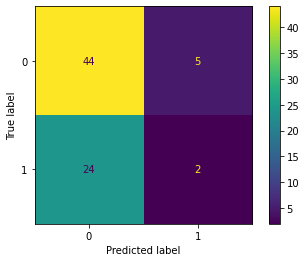

In [ ]:
log_disp = ConfusionMatrixDisplay(confusion_matrix=logistic_conf, display_labels=logistic_classifier.classes_)
log_disp.plot()
print(logistic_conf)

**K-NN Classification**

[[47  2]
 [26  0]]


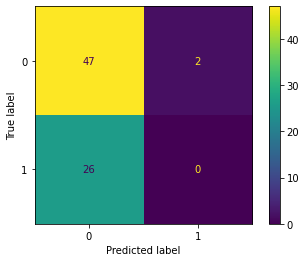

In [ ]:
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_conf, display_labels=knn_classifier.classes_)
knn_disp.plot()
print(knn_conf)

**Linear SVM**

[[45  4]
 [25  1]]


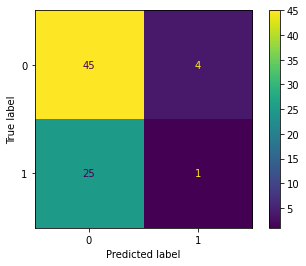

In [ ]:
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_conf, display_labels=svm_classifier.classes_)
svm_disp.plot()
print(svm_conf)

**Non Linear Kernel SVM**

[[43  6]
 [24  2]]


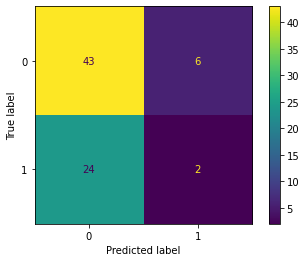

In [ ]:
kernel_svm_disp = ConfusionMatrixDisplay(confusion_matrix=kernel_conf, display_labels=kernel_classifier.classes_)
kernel_svm_disp.plot()
print(kernel_conf)

**Naive Bayes Classification**

[[46  3]
 [24  2]]


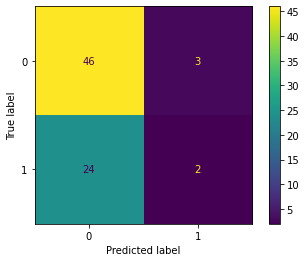

In [ ]:
naive_disp = ConfusionMatrixDisplay(confusion_matrix=naive_conf, display_labels=naive_classifier.classes_)
naive_disp.plot()
print(naive_conf)

**Decision Tree classification**

[[34 15]
 [15 11]]


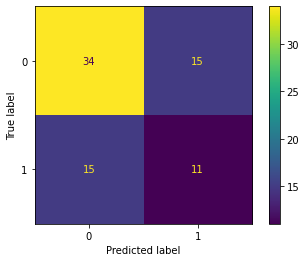

In [ ]:
tree_disp = ConfusionMatrixDisplay(confusion_matrix=tree_conf, display_labels=tree_classifier.classes_)
tree_disp.plot()
print(tree_conf)

**Random Forest Classification**

[[39 10]
 [18  8]]


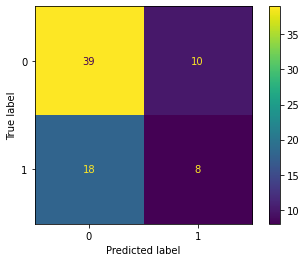

In [ ]:
forest_disp = ConfusionMatrixDisplay(confusion_matrix=forest_conf, display_labels=forest_classifier.classes_)
forest_disp.plot()
print(forest_conf)

**CAP CURVE**

**LOGISTIC REGRESSION**

      0         1         2
0   0.0  0.935616  0.064384
1   0.0  0.909682  0.090318
2   0.0  0.907147  0.092853
3   0.0  0.903721  0.096279
4   0.0  0.902573  0.097427
5   0.0  0.895765  0.104235
6   1.0  0.883146  0.116854
7   0.0  0.882211  0.117789
8   0.0  0.873047  0.126953
9   0.0  0.865797  0.134203
10  0.0  0.864726  0.135274
11  0.0  0.862361  0.137639
12  0.0  0.853277  0.146723
13  0.0  0.849692  0.150308
14  0.0  0.843851  0.156149
15  1.0  0.835196  0.164804
16  0.0  0.829906  0.170094
17  0.0  0.826761  0.173239
18  0.0  0.821207  0.178793
19  0.0  0.813723  0.186277


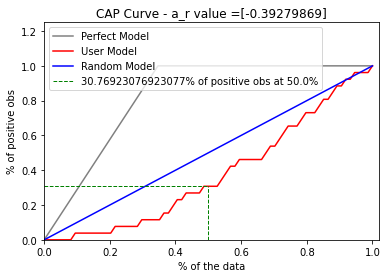

In [ ]:
capcurve(y_test, logistic_classifier.predict_proba(x_test))

**K-NN Classification**

      0    1    2
0   0.0  1.0  0.0
1   0.0  1.0  0.0
2   1.0  1.0  0.0
3   0.0  1.0  0.0
4   0.0  1.0  0.0
5   0.0  1.0  0.0
6   0.0  1.0  0.0
7   0.0  0.9  0.1
8   0.0  0.9  0.1
9   0.0  0.9  0.1
10  0.0  0.9  0.1
11  0.0  0.9  0.1
12  1.0  0.9  0.1
13  1.0  0.9  0.1
14  0.0  0.9  0.1
15  1.0  0.9  0.1
16  0.0  0.9  0.1
17  0.0  0.9  0.1
18  1.0  0.9  0.1
19  0.0  0.9  0.1


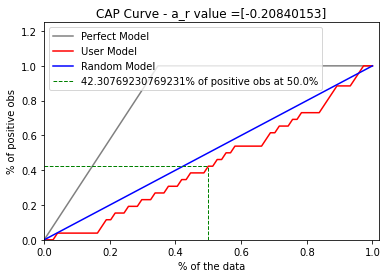

In [ ]:
capcurve(y_test, knn_classifier.predict_proba(x_test))

**Linear SVM**

      0         1         2
0   0.0  0.834682  0.165318
1   0.0  0.822589  0.177411
2   0.0  0.819431  0.180569
3   1.0  0.813131  0.186869
4   0.0  0.812386  0.187614
5   0.0  0.809004  0.190996
6   0.0  0.804595  0.195405
7   0.0  0.803805  0.196195
8   1.0  0.798850  0.201150
9   0.0  0.798480  0.201520
10  0.0  0.792653  0.207347
11  0.0  0.791833  0.208167
12  0.0  0.791131  0.208869
13  0.0  0.790825  0.209175
14  0.0  0.790809  0.209191
15  0.0  0.786892  0.213108
16  0.0  0.780646  0.219354
17  0.0  0.779760  0.220240
18  0.0  0.773437  0.226563
19  1.0  0.772191  0.227809


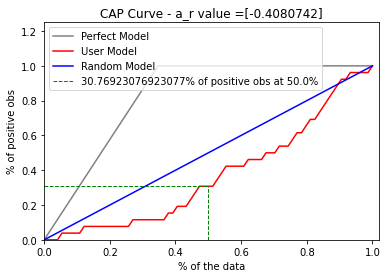

In [ ]:
capcurve(y_test, svm_classifier.predict_proba(x_test))

**Non Linear Kernel SVM**

      0         1         2
0   0.0  0.885823  0.114177
1   0.0  0.880646  0.119354
2   0.0  0.849867  0.150133
3   1.0  0.846670  0.153330
4   0.0  0.846644  0.153356
5   0.0  0.839920  0.160080
6   0.0  0.831942  0.168058
7   0.0  0.824255  0.175745
8   1.0  0.823291  0.176709
9   0.0  0.822627  0.177373
10  0.0  0.821480  0.178520
11  1.0  0.818177  0.181823
12  0.0  0.817731  0.182269
13  0.0  0.812066  0.187934
14  1.0  0.811791  0.188209
15  0.0  0.803734  0.196266
16  1.0  0.802949  0.197051
17  0.0  0.802848  0.197152
18  0.0  0.802394  0.197606
19  1.0  0.802214  0.197786


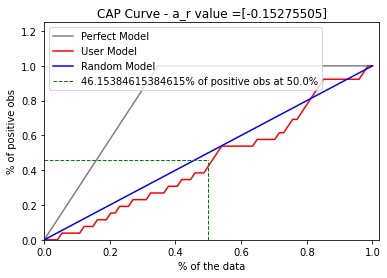

In [ ]:
capcurve(y_test, kernel_classifier.predict_proba(x_test))

**Naive Bayes Classification**

      0         1         2
0   0.0  0.962142  0.037858
1   0.0  0.956376  0.043624
2   0.0  0.950401  0.049599
3   0.0  0.948992  0.051008
4   0.0  0.947094  0.052906
5   0.0  0.946911  0.053089
6   0.0  0.944386  0.055614
7   0.0  0.943086  0.056914
8   0.0  0.942807  0.057193
9   0.0  0.940085  0.059915
10  0.0  0.940059  0.059941
11  0.0  0.939517  0.060483
12  1.0  0.936371  0.063629
13  0.0  0.935313  0.064687
14  0.0  0.932629  0.067371
15  0.0  0.932152  0.067848
16  0.0  0.927244  0.072756
17  1.0  0.925216  0.074784
18  0.0  0.925203  0.074797
19  0.0  0.923745  0.076255


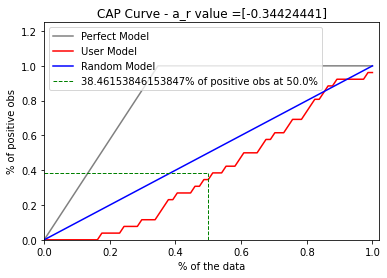

In [ ]:
capcurve(y_test, naive_classifier.predict_proba(x_test))

**Decision Tree classification**

      0    1    2
0   0.0  1.0  0.0
1   0.0  1.0  0.0
2   0.0  1.0  0.0
3   0.0  1.0  0.0
4   1.0  1.0  0.0
5   1.0  1.0  0.0
6   0.0  1.0  0.0
7   0.0  1.0  0.0
8   0.0  1.0  0.0
9   1.0  1.0  0.0
10  0.0  1.0  0.0
11  1.0  1.0  0.0
12  0.0  1.0  0.0
13  0.0  1.0  0.0
14  0.0  1.0  0.0
15  0.0  1.0  0.0
16  1.0  1.0  0.0
17  0.0  1.0  0.0
18  0.0  1.0  0.0
19  1.0  1.0  0.0


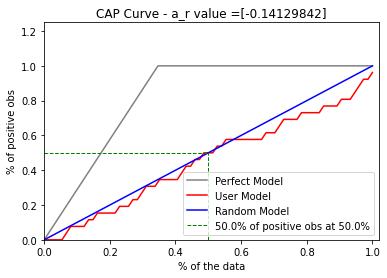

In [ ]:
capcurve(y_test, tree_classifier.predict_proba(x_test))

**Random Forest Classification**

      0    1    2
0   1.0  1.0  0.0
1   0.0  1.0  0.0
2   0.0  1.0  0.0
3   0.0  1.0  0.0
4   0.0  1.0  0.0
5   0.0  1.0  0.0
6   0.0  1.0  0.0
7   1.0  1.0  0.0
8   0.0  1.0  0.0
9   0.0  1.0  0.0
10  0.0  0.9  0.1
11  0.0  0.9  0.1
12  0.0  0.9  0.1
13  0.0  0.9  0.1
14  0.0  0.9  0.1
15  1.0  0.9  0.1
16  0.0  0.9  0.1
17  1.0  0.9  0.1
18  0.0  0.9  0.1
19  1.0  0.9  0.1


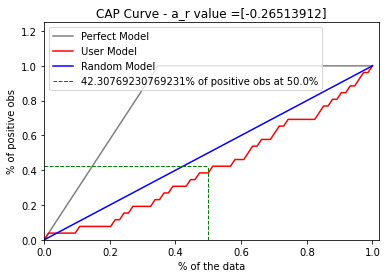

In [ ]:
capcurve(y_test, forest_classifier.predict_proba(x_test))

# CONVERT JUPYTER TO WORD

In [ ]:
!pip install pandoc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 117 kB 7.7 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
  Created wheel for pandoc: filename=pandoc-2.2-py3-none-any.whl size=29558 sha256=57d3521b6792c62cc32f98e89818e1c280148370474b4401b9eb4f44e2605dd0
  Stored in directory: /root/.cache/pip/wheels/e7/e3/1e/31f9b28058a3fc0b63be4076a4e9f6ac79c332bb7e1d6c4ec9
Successfully built pandoc


In [ ]:
import pandoc

In [ ]:
!jupyter nbconvert -- to html /content/drive/MyDrive/Semester_5/Sistem_Cerdas/siscer.ipynb

[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'html' matched no files
[NbConvertApp] Converting notebook /content/drive/MyDrive/Semester_5/Sistem_Cerdas/siscer.ipynb to html
[NbConvertApp] Writing 869424 bytes to /content/drive/MyDrive/Semester_5/Sistem_Cerdas/siscer.html


In [ ]:
!pandoc /content/drive/MyDrive/Semester_5/Sistem_Cerdas/siscer.html -s -o siscer.docx

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
data = tfds.load('movielens/100k-ratings', split ='train', with_info=True)

In [ ]:
tfds.as_dataframe(data[0]).describe()

,bucketized_user_age,raw_user_age,timestamp,user_occupation_label,user_rating
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,29.235460,32.969849,8.835289e+08,11.404320,3.529860
std,12.005926,11.562623,5.343856e+06,6.549283,1.125674
min,1.000000,7.000000,8.747247e+08,0.000000,1.000000
25%,18.000000,24.000000,8.794487e+08,6.000000,3.000000
50%,25.000000,30.000000,8.828269e+08,12.000000,4.000000
75%,35.000000,40.000000,8.882600e+08,17.000000,4.000000
max,56.000000,73.000000,8.932866e+08,21.000000,5.000000


In [ ]:
tuple = (1,2)
tuple

(1, 2)

In [ ]:
class Kendaraan:
  def __init__(self, warna):
    self.tipe = 'darat'
    self.warna_kendaraan = warna

  def cek_mesin(self):
    print(f'Mesin {self.warna_kendaraan} Oke')

In [ ]:
class Car(Kendaraan):
  def __init__(self, warna):
    super().__init__(warna)
    self.roda = 4
    self.kursi = 4
    self.engine = 1
    self.posisi_engine = 'didepan'


  def maju(self):
    print(f'Mobil {self.warna} Melaju')

  def rem(self):
    print(f'Mobil {self.warna} Mengerem')





In [ ]:
mobil_listrik = Car('Merah')
mobil_listrik.cek_mesin()

Mesin Merah Oke


In [ ]:
type(mobil_listrik)

__main__.Car

In [ ]:
model_user = tf.saved_model.load('user_model.h5')

In [ ]:
model_movie = tf.saved_model.load('movie_model.h5')

In [ ]:
model_movie.trainable = False
model_tempat_ibadah = tf.Sequential([
    model_movie,
    tf.keras.layers.Dense(128, ),
    tf.keras.layers.Dense(128, ),
    tf.keras.layers.Dense(128, )
])